# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['dayofweek'] = pd.to_datetime(df['timestamp']).dt.day_of_week
df.drop(columns=['timestamp'], inplace=True)
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


In [3]:
scaler = StandardScaler()
df[['numTrials', 'hour']] = scaler.fit_transform(pd.DataFrame(df[['numTrials', 'hour']]))

In [4]:
enc = OneHotEncoder()
encoded_data = enc.fit_transform(df[['uid', 'labname']]).toarray()
names = enc.get_feature_names_out(['uid', 'labname'])
encoded_data = pd.DataFrame(encoded_data, columns=names)
df = pd.concat([encoded_data, df],  axis=1)
df = df.drop(columns=['uid', 'labname'])
df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [5]:
df.to_csv('../data/dayofweek.csv')

In [6]:
df['dayofweek'].value_counts().sort_values().tail(1)

dayofweek
3    396
Name: count, dtype: int64

In [7]:
accuracy_score(df['dayofweek'], [3]*df.shape[0])

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [8]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']
logreg = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear').fit(X, y)
y_logreg = logreg.predict(X)
accuracy_score(y, y_logreg)

/home/varvara/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


0.6215895610913404

In [9]:
coefs = logreg.coef_
column_names = X.columns

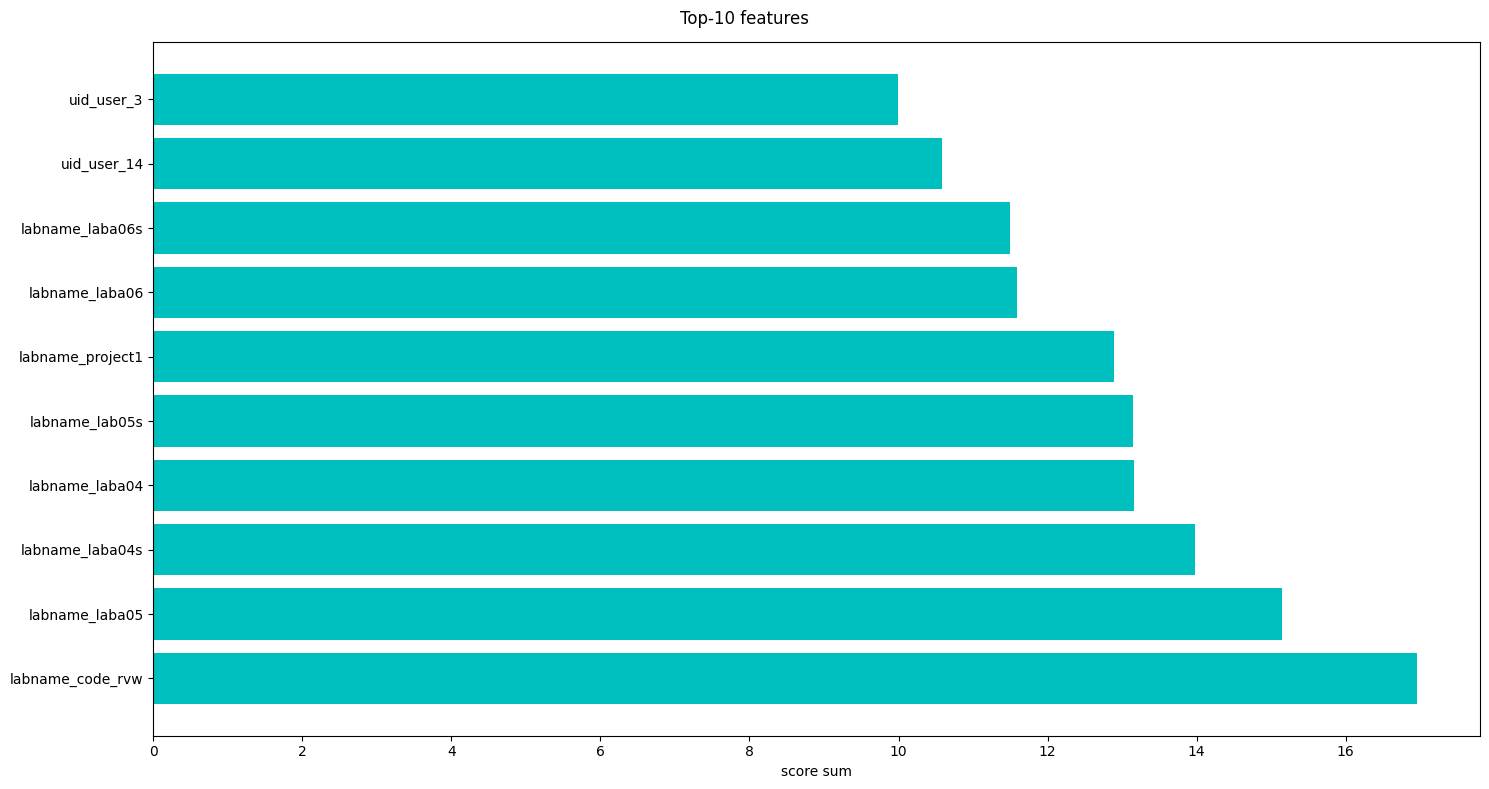

In [10]:
def draw_plot(coefs, column_names, n=10):
    coefs = pd.DataFrame(coefs).apply(lambda x: abs(x))
    top_n = coefs.sum(axis=0).sort_values(ascending=False).head(n)
    fig = plt.figure(figsize=(15, 8))
    plt.barh(top_n.index.map(lambda x: column_names[x]), top_n.values, color='c')
    plt.suptitle(f'Top-{n} features')
    plt.xlabel('score sum')
    plt.tight_layout()
    plt.show()

draw_plot(coefs, column_names)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [122]:
svc = SVC(kernel='linear', probability=True, random_state=21).fit(X, y)
y_svc = svc.predict(X)
accuracy_score(y, y_svc)

0.702846975088968

In [133]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel_ in kernels:
    svc_1 = SVC(kernel=kernel_, probability=True, random_state=21).fit(X, y)
    accuracy = accuracy_score(y, svc_1.predict(X))
    print(f"kernel : {kernel_}, accuracy : {accuracy}")

kernel : linear, accuracy : 0.702846975088968
kernel : poly, accuracy : 0.8594306049822064
kernel : rbf, accuracy : 0.8558718861209964
kernel : sigmoid, accuracy : 0.3997627520759193


In [ ]:
clf = OneVsRestClassifier(svc).fit(X, y)

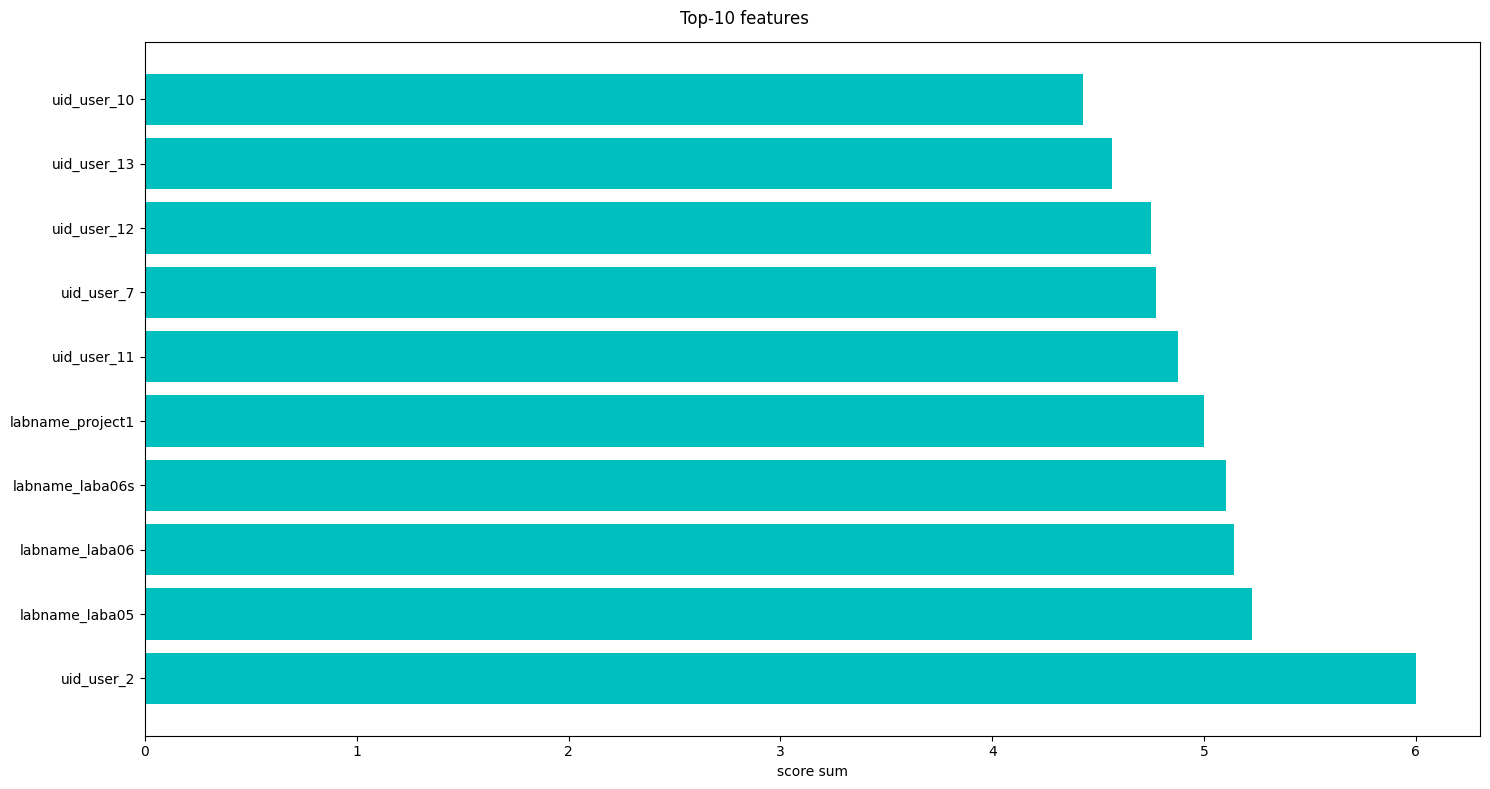

In [132]:
coefs = np.array([estimator.coef_ for estimator in clf.estimators_]).reshape(7, 43)
draw_plot(coefs, column_names)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [135]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21).fit(X, y)
y_tree = tree.predict(X)
accuracy_score(y, y_tree)

0.5516014234875445

In [141]:
for md in range(2, 30, 2):
    tree_1 = DecisionTreeClassifier(max_depth=md, random_state=21).fit(X, y)
    accuracy = accuracy_score(y, tree_1.predict(X))
    print(f"max_depth : {md}, accuracy : {accuracy}")

max_depth : 2, accuracy : 0.4389086595492289
max_depth : 4, accuracy : 0.5516014234875445
max_depth : 6, accuracy : 0.6637010676156584
max_depth : 8, accuracy : 0.7502965599051008
max_depth : 10, accuracy : 0.8196915776986952
max_depth : 12, accuracy : 0.8831553973902728
max_depth : 14, accuracy : 0.9317912218268091
max_depth : 16, accuracy : 0.9608540925266904
max_depth : 18, accuracy : 0.9798339264531435
max_depth : 20, accuracy : 0.9869513641755635
max_depth : 22, accuracy : 0.9922894424673784
max_depth : 24, accuracy : 0.9958481613285883
max_depth : 26, accuracy : 0.9988137603795967
max_depth : 28, accuracy : 1.0


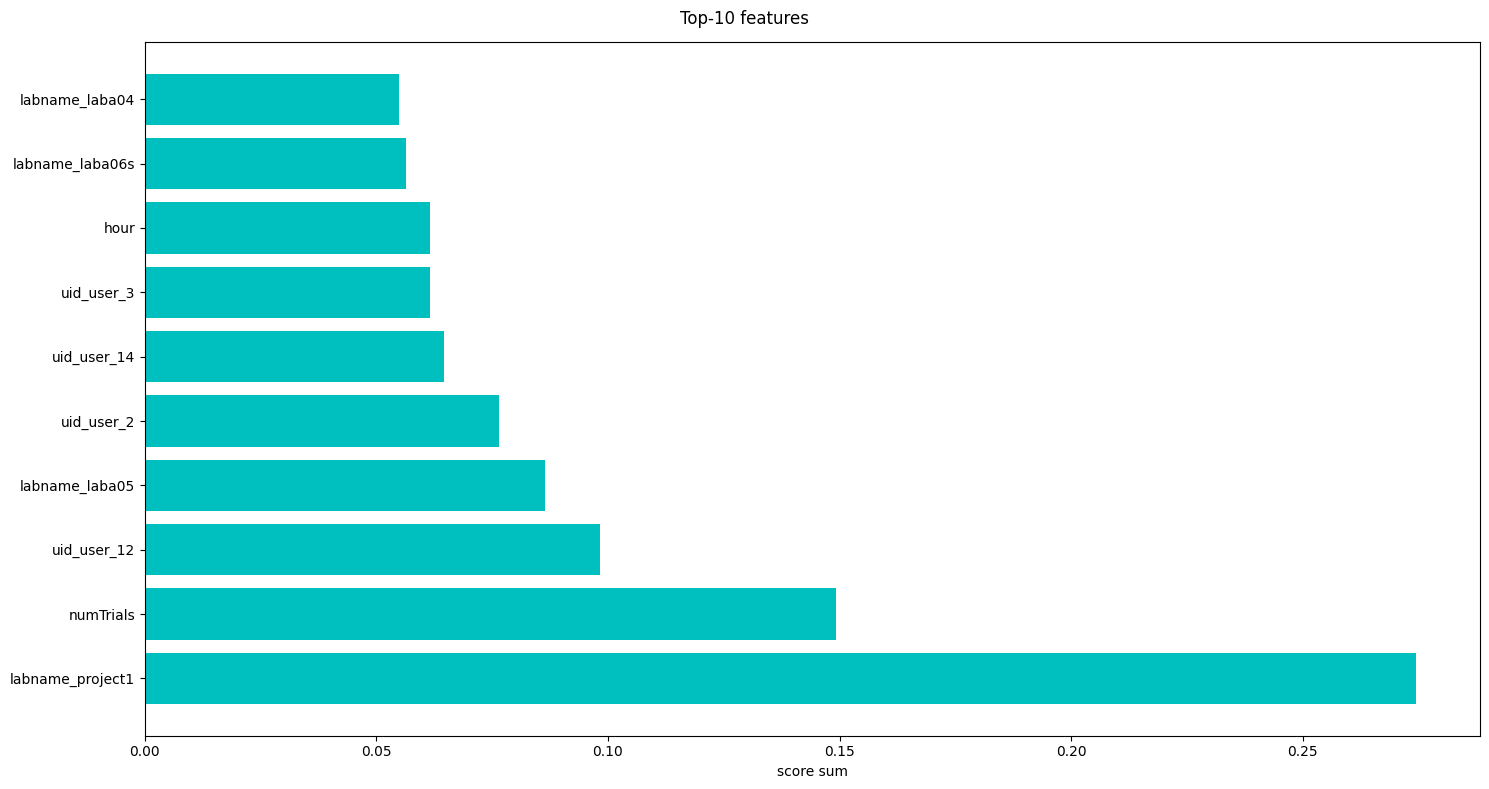

In [148]:
coefs = pd.DataFrame(tree.feature_importances_).T
draw_plot(coefs, column_names)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [151]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21).fit(X, y)
y_rf = rf.predict(X)
accuracy_score(y, y_rf)

0.9988137603795967

In [155]:
for md in range(10, 35, 5):
        for n_e in range(50, 200, 50):
            rf_1 = RandomForestClassifier(n_estimators=n_e, max_depth=md, random_state=21).fit(X, y)
            accuracy = accuracy_score(y, rf_1.predict(X))
            print(f"max_depth : {md}, n_estimators : {n_e}, accuracy : {accuracy}")

max_depth : 10, n_estimators : 50, accuracy : 0.8795966785290629
max_depth : 10, n_estimators : 100, accuracy : 0.8701067615658363
max_depth : 10, n_estimators : 150, accuracy : 0.8623962040332147
max_depth : 15, n_estimators : 50, accuracy : 0.9798339264531435
max_depth : 15, n_estimators : 100, accuracy : 0.9804270462633452
max_depth : 15, n_estimators : 150, accuracy : 0.9804270462633452
max_depth : 20, n_estimators : 50, accuracy : 0.9976275207591934
max_depth : 20, n_estimators : 100, accuracy : 0.9976275207591934
max_depth : 20, n_estimators : 150, accuracy : 0.99644128113879
max_depth : 25, n_estimators : 50, accuracy : 0.9994068801897983
max_depth : 25, n_estimators : 100, accuracy : 0.9988137603795967
max_depth : 25, n_estimators : 150, accuracy : 0.9994068801897983
max_depth : 30, n_estimators : 50, accuracy : 1.0
max_depth : 30, n_estimators : 100, accuracy : 1.0
max_depth : 30, n_estimators : 150, accuracy : 1.0


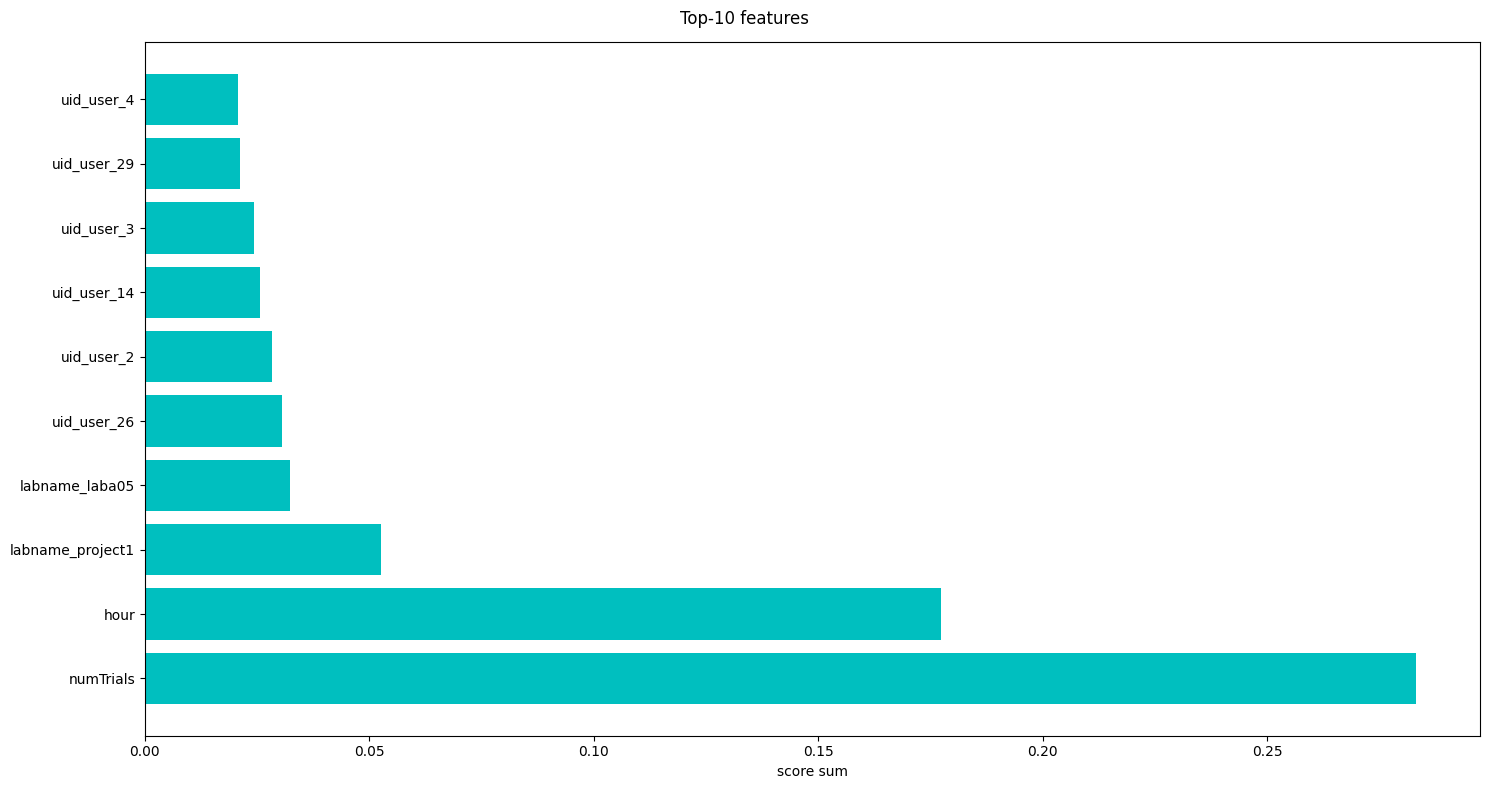

In [159]:
coefs = pd.DataFrame(rf.feature_importances_).T
draw_plot(coefs, column_names)